In [3]:
# Task 3(Level 2)K-Means Clustering

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler


In [5]:
iris = load_iris()
data = iris.data  # Features
labels = iris.target  # Target (optional)

In [6]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)


In [7]:
print(scaled_data[:5])

[[-0.90068117  1.01900435 -1.34022653 -1.3154443 ]
 [-1.14301691 -0.13197948 -1.34022653 -1.3154443 ]
 [-1.38535265  0.32841405 -1.39706395 -1.3154443 ]
 [-1.50652052  0.09821729 -1.2833891  -1.3154443 ]
 [-1.02184904  1.24920112 -1.34022653 -1.3154443 ]]


In [8]:
import numpy as np

# Check the mean and standard deviation of the scaled data
print("Mean of scaled data:\n", np.mean(scaled_data, axis=0))
print("Standard deviation of scaled data:\n", np.std(scaled_data, axis=0))


Mean of scaled data:
 [-1.69031455e-15 -1.84297022e-15 -1.69864123e-15 -1.40924309e-15]
Standard deviation of scaled data:
 [1. 1. 1. 1.]


In [9]:
from sklearn.cluster import KMeans


In [10]:
# Step 3: Apply K-Means clustering with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(scaled_data)

KMeans(n_clusters=3, random_state=42)

In [11]:
labels = kmeans.labels_
centroids = kmeans.cluster_centers_


In [12]:
# Display the labels and centroids
print("Cluster Labels:\n", labels)
print("Centroids:\n", centroids)

Cluster Labels:
 [1 2 2 2 1 1 1 1 2 2 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 2 2 1 1 1 2 2 1
 1 2 1 1 2 2 1 1 2 1 2 1 1 0 0 0 0 0 0 0 2 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
Centroids:
 [[ 0.57100359 -0.37176778  0.69111943  0.66315198]
 [-0.81623084  1.31895771 -1.28683379 -1.2197118 ]
 [-1.32765367 -0.373138   -1.13723572 -1.11486192]]


In [13]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_data)


In [14]:
# Create a DataFrame for visualization
import pandas as pd
df = pd.DataFrame(reduced_data, columns=["PCA1", "PCA2"])
df['Cluster'] = labels

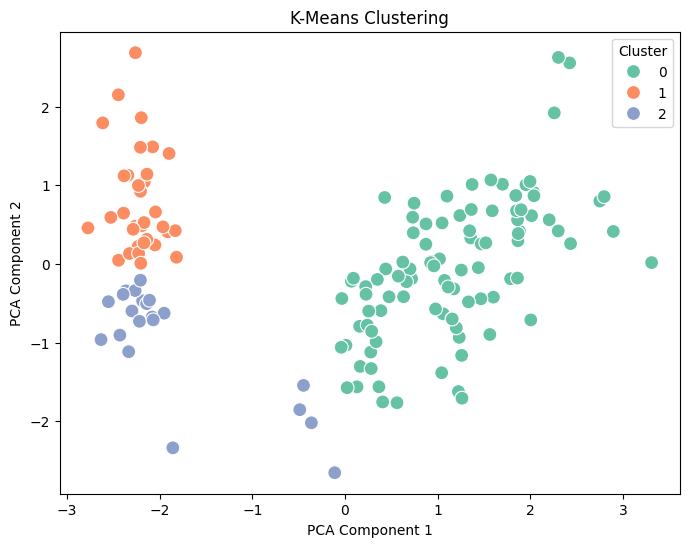

In [15]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="PCA1", y="PCA2", hue="Cluster", palette="Set2", s=100)
plt.title("K-Means Clustering")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()


In [16]:
from sklearn.cluster import KMeans


In [17]:
wcss = []
K = range(1, 11)  # Try cluster numbers from 1 to 10


In [18]:
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)  # inertia_ = WCSS

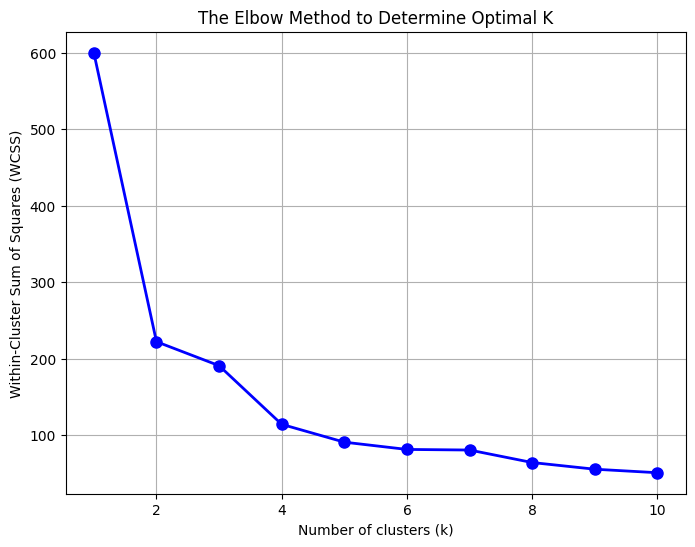

In [19]:
# Plot the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(K, wcss, 'bo-', linewidth=2, markersize=8)
plt.title('The Elbow Method to Determine Optimal K')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.grid(True)
plt.show()

In [20]:
from sklearn.decomposition import PCA

In [ ]:
# Reduce to 2D for visualization
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_data)


In [22]:
# Fit KMeans with optimal K (let's assume it's 3, if you found something else in elbow plot, replace 3)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(scaled_data)
labels = kmeans.labels_


In [23]:
# Create a DataFrame for visualization
df = pd.DataFrame(reduced_data, columns=["PCA1", "PCA2"])
df['Cluster'] = labels

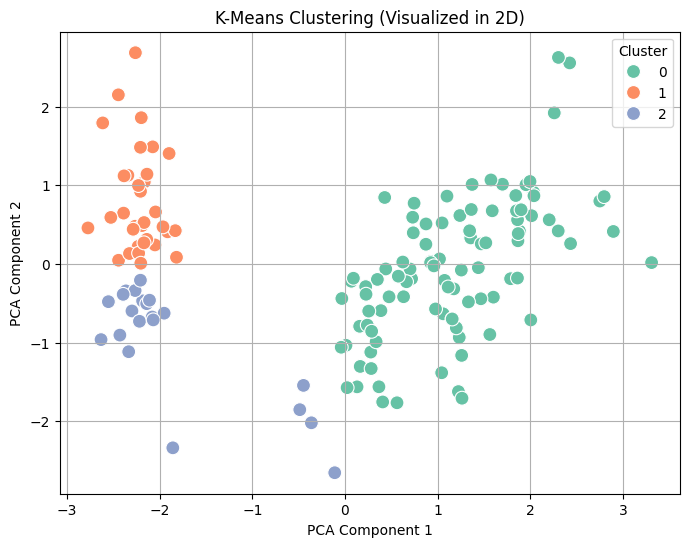

In [24]:
# Visualize the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="PCA1", y="PCA2", hue="Cluster", palette="Set2", s=100)
plt.title("K-Means Clustering (Visualized in 2D)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")
plt.grid(True)
plt.show()

In [25]:
# Check how many samples in each cluster
import numpy as np
unique, counts = np.unique(labels, return_counts=True)
print(dict(zip(unique, counts)))


{np.int32(0): np.int64(96), np.int32(1): np.int64(33), np.int32(2): np.int64(21)}
